In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
import numpy as np 
import pandas as pd

file_path = 'movie_data/chunk_1_with_info.csv'

df_movies = pd.read_csv(file_path)
print(df_movies['title'].head(20))

0                      Summer of 85
1                        Free Birds
2                        Blood Work
3               Hiroshima Mon Amour
4                  A Bridge Too Far
5               Message in a Bottle
6     Barbie: Princess Charm School
7                      The Big Year
8                         Duplicity
9                       Rock'n Roll
10                    A Close Shave
11                    Andrei Rublev
12                          Harriet
13                Diary of the Dead
14               Testament of Youth
15     History of the World: Part I
16                All That Glitters
17                      Slumberland
18                            Hours
19                         Raw Deal
Name: title, dtype: object


In [48]:
df_movies.shape

(5000, 27)

In [49]:
df_movies.info

<bound method DataFrame.info of           id                title  vote_average  vote_count    status  \
0     659959         Summer of 85         7.408         714  Released   
1     175574           Free Birds         5.862         714  Released   
2       9573           Blood Work         6.156         712  Released   
3       5544  Hiroshima Mon Amour         7.777         712  Released   
4       5902     A Bridge Too Far         7.222         712  Released   
...      ...                  ...           ...         ...       ...   
4995  321769             Deep Web         6.764         256  Released   
4996   16729           Don't Move         6.969         256  Released   
4997  158990           Wrong Cops         6.152         256  Released   
4998  486078          Il vegetale         5.700         256  Released   
4999  919573         The Innocent         6.895         256  Released   

     release_date    revenue  runtime  adult  \
0      2020-07-14    3600000      101  Fals

In [50]:
df_movies.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5.000000e+03,5000.000000
mean,2.026620e+05,6.492086,424.095400,1.073562e+07,101.320800,7.190641e+06,16.791120
std,2.544705e+05,0.815846,128.003294,2.771883e+07,23.115881,1.383037e+07,56.802788
min,2.000000e+00,2.098000,256.000000,0.000000e+00,0.000000,0.000000e+00,0.600000
25%,1.160575e+04,5.961500,312.000000,0.000000e+00,91.000000,0.000000e+00,10.129000
50%,4.118600e+04,6.515000,398.000000,9.011700e+04,100.000000,0.000000e+00,12.913500
75%,3.820468e+05,7.091250,518.000000,1.084960e+07,111.000000,9.000000e+06,16.138000
max,1.140066e+06,8.550000,714.000000,7.425000e+08,366.000000,1.500000e+08,2680.593000


In [51]:
# Select relevant columns for analysis
columns = ['runtime', 'budget', 'original_language', 'genres', 'production_companies', 'vote_average','adult']

# Extract relevant data
relevant_data = df_movies[columns]


In [52]:
relevant_data

,runtime,budget,original_language,genres,production_companies,vote_average,adult
0,101,6900000,fr,"Romance, Drama","Mandarin Production, SCOPE Pictures",7.408,False
1,91,55000000,en,"Animation, Comedy, Family","Reel FX Creative Studios, Relativity Media",5.862,False
2,110,50000000,en,"Thriller, Crime","Malpaso Productions, Warner Bros. Pictures",6.156,False
3,92,0,fr,"Drama, History, Romance","Argos Films, Como Films, Daiei Film, Pathé Ove...",7.777,False
4,175,22000000,en,"Drama, History, War","United Artists, Joseph E. Levine Productions",7.222,False
...,...,...,...,...,...,...,...
4995,89,0,en,Documentary,"Trouper, BOND/360, Zipper Bros Films, Exhibit ...",6.764,False
4996,125,0,it,"Drama, Romance","Cineritmo, Alquimia Cinema, Cattleya",6.969,False
4997,83,0,en,"Comedy, Crime, Mystery","Timwe, Realitism Films, CTB Film Company, Rubb...",6.152,False
4998,84,8166084,it,Comedy,"The Walt Disney Company Italia, 3Zero2Tv",5.700,False


# Distribution Analysis

## Histogram of Runtime

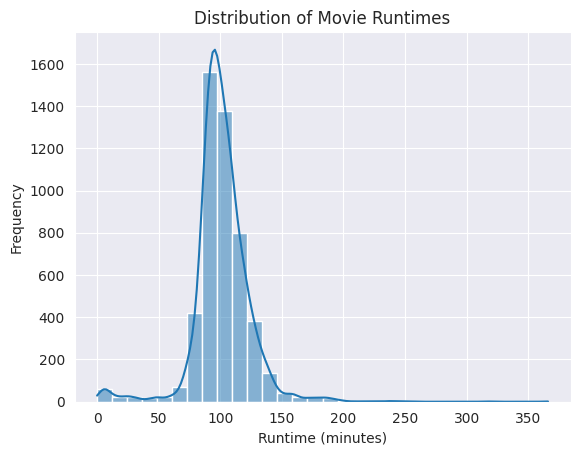

In [53]:
sns.histplot(relevant_data['runtime'], bins=30, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

# EDA
## Corelation Analysis

In [54]:
correlation = relevant_data['runtime'].corr(relevant_data['vote_average'])

print(f"Correlation between runtime and vote_average: {correlation}")


Correlation between runtime and vote_average: 0.15738207438910665


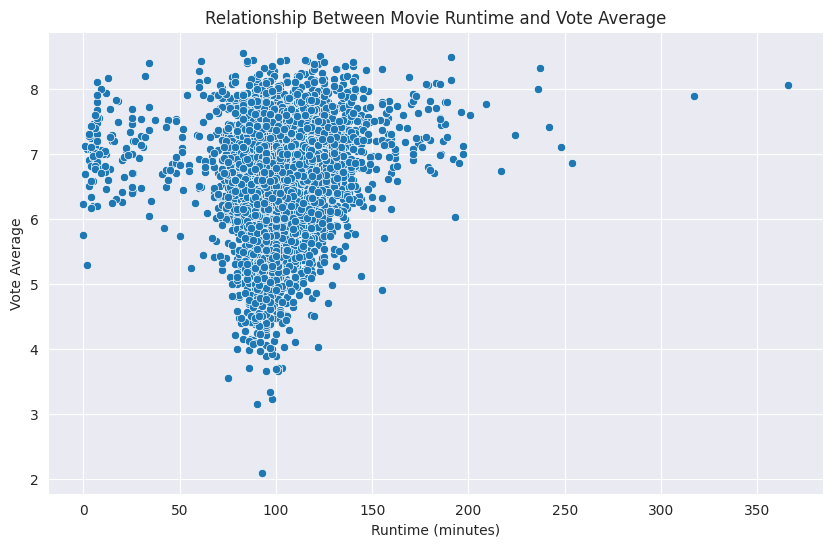

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=relevant_data['runtime'], y=relevant_data['vote_average'])
# Add title and labels
plt.title('Relationship Between Movie Runtime and Vote Average')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Vote Average')
plt.grid(True)

# Show the plot
plt.show()

In [56]:
correlation = relevant_data['budget'].corr(relevant_data['vote_average'])

print(f"Correlation between budget and vote_average: {correlation}")


Correlation between budget and vote_average: -0.21788469638765692


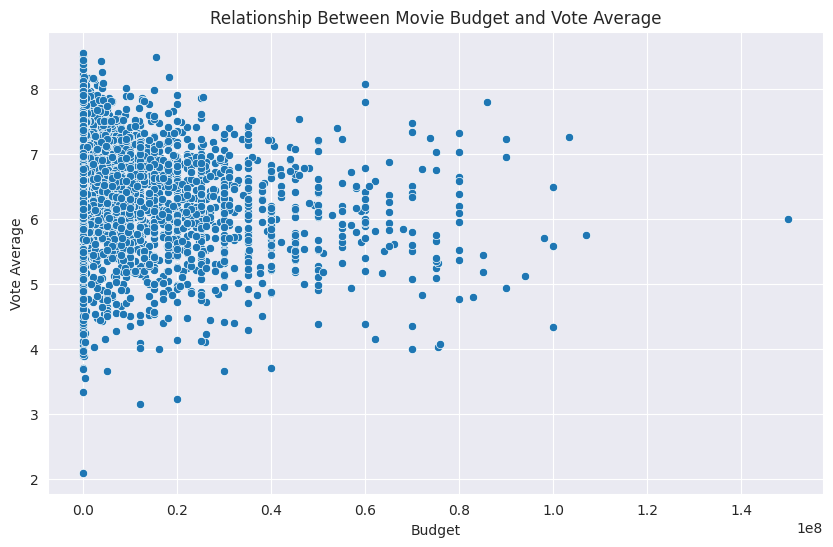

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=relevant_data['budget'], y=relevant_data['vote_average'])
# Add title and labels
plt.title('Relationship Between Movie Budget and Vote Average')
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.grid(True)

# Show the plot
plt.show()

In [58]:
adult_vs_non_adult = relevant_data.groupby('adult').agg({'vote_average':['count','mean']}).reset_index()

adult_vs_non_adult.columns = ['adult', 'movie_count', 'mean_vote_average']
print(adult_vs_non_adult)


   adult  movie_count  mean_vote_average
0  False         5000           6.492086


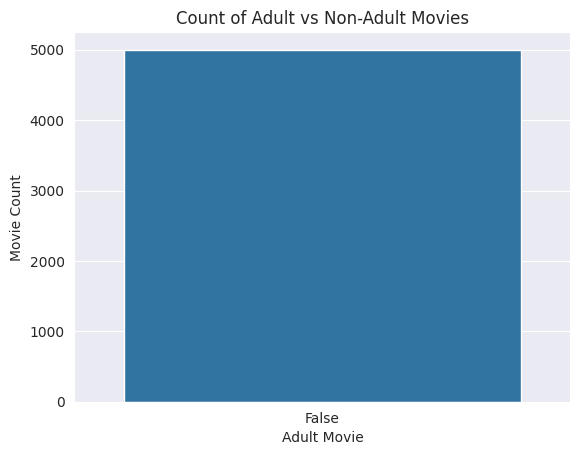

In [59]:
# Bar plot for the count of adult and non-adult movies
sns.barplot(x='adult', y='movie_count', data=adult_vs_non_adult)
plt.title('Count of Adult vs Non-Adult Movies')
plt.xlabel('Adult Movie')
plt.ylabel('Movie Count')
plt.show()

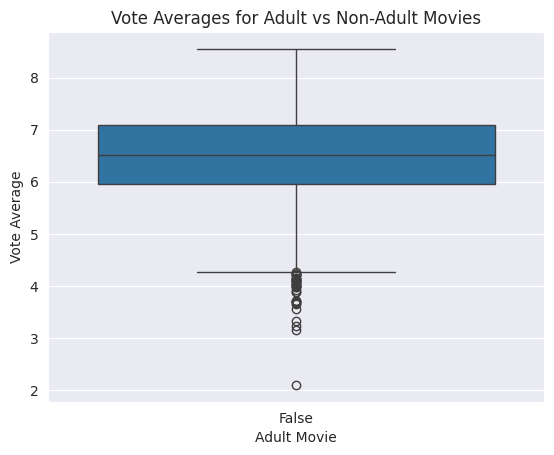

In [60]:
# Box plot for the vote averages of adult vs non-adult movies
sns.boxplot(x='adult', y='vote_average', data=relevant_data)
plt.title('Vote Averages for Adult vs Non-Adult Movies')
plt.xlabel('Adult Movie')
plt.ylabel('Vote Average')
plt.show()

In [61]:
language_analysis = relevant_data.groupby('original_language').agg({'vote_average': ['count', 'mean']}).reset_index()

# Rename columns for clarity
language_analysis.columns = ['original_language', 'movie_count', 'mean_vote_average']

# Sort by movie count (optional, for better visualization)
language_analysis = language_analysis.sort_values(by='movie_count', ascending=False)

# Display the analysis
print(language_analysis)

   original_language  movie_count  mean_vote_average
8                 en         3459           6.349178
14                fr          479           6.522228
21                it          300           6.516327
22                ja          188           7.233984
9                 es          135           6.929652
6                 de           62           6.968613
24                ko           55           7.314127
41                zh           47           7.136426
3                 cn           38           6.897263
31                ru           36           7.046611
29                pt           27           7.379148
34                sv           24           7.298875
17                hi           23           7.214000
5                 da           21           7.063190
27                no           16           6.696000
38                tr           11           7.473455
28                pl           11           6.638455
26                nl            8           7.

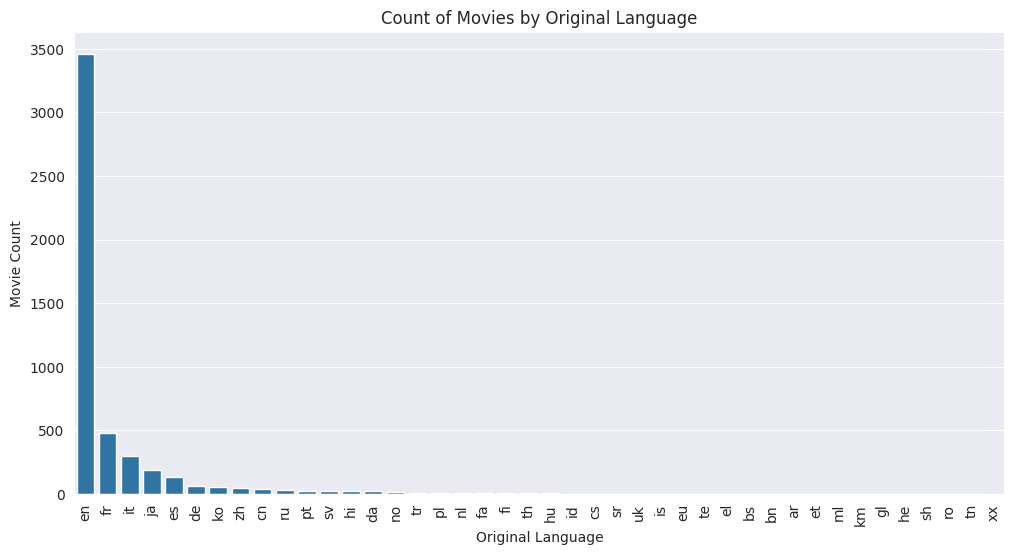

In [62]:
# Bar plot for the count of movies per original language
plt.figure(figsize=(12, 6))
sns.barplot(x='original_language', y='movie_count', data=language_analysis)
plt.title('Count of Movies by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Movie Count')
plt.xticks(rotation=90)
plt.show()

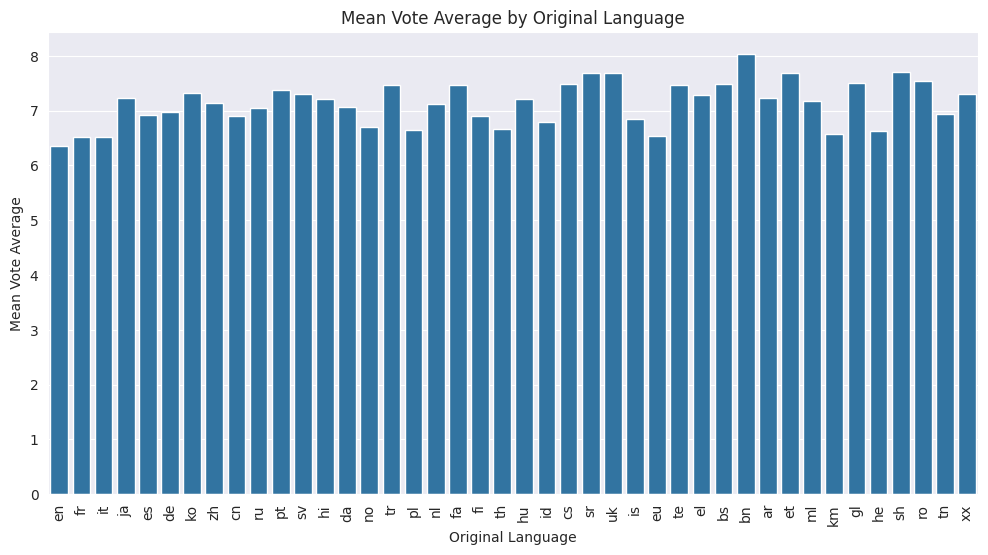

In [63]:
# Bar plot for the mean vote average per original language
plt.figure(figsize=(12, 6))
sns.barplot(x='original_language', y='mean_vote_average', data=language_analysis)
plt.title('Mean Vote Average by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Mean Vote Average')
plt.xticks(rotation=90)
plt.show()

To understand the spread of vote averages across different languages, we can also use a boxplot

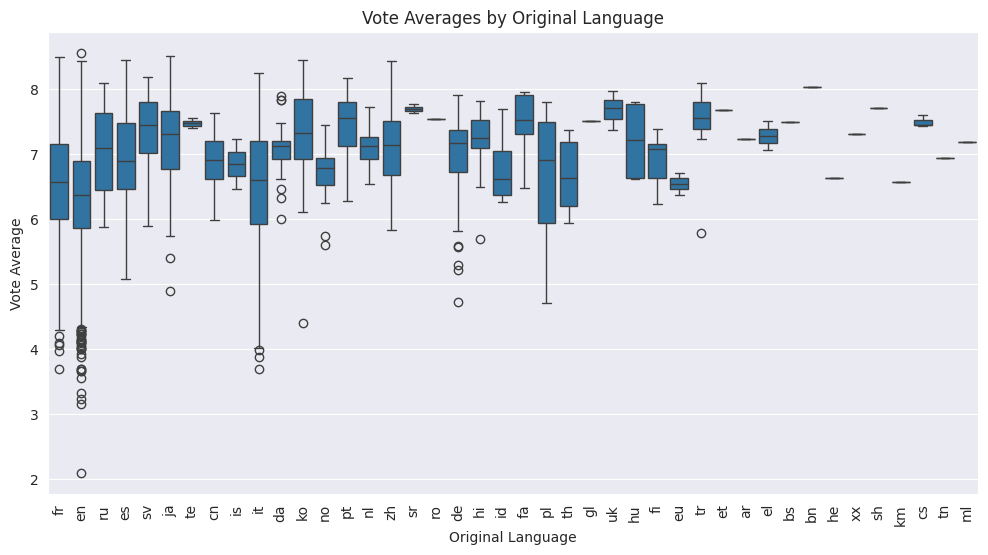

In [64]:
# Box plot for vote averages across original languages
plt.figure(figsize=(12, 6))
sns.boxplot(x='original_language', y='vote_average', data=relevant_data)
plt.title('Vote Averages by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Vote Average')
plt.xticks(rotation=90)
plt.show()

In [65]:
relevant_data_copy = relevant_data.copy()
relevant_data_copy['genres'] = relevant_data_copy['genres'].str.split(', ')
data_genres = relevant_data_copy.explode('genres')

# Group by 'genres' and calculate count and mean vote average
genre_analysis = data_genres.groupby('genres').agg({'vote_average': ['count', 'mean']}).reset_index()

# Rename columns for clarity
genre_analysis.columns = ['genres', 'movie_count', 'mean_vote_average']

# Sort by movie count (optional, for better visualization)
genre_analysis = genre_analysis.sort_values(by='movie_count', ascending=False)

# Display the analysis
print(genre_analysis)

             genres  movie_count  mean_vote_average
6             Drama         2267           6.729995
3            Comedy         1936           6.363489
16         Thriller         1189           6.199349
0            Action          896           6.320342
13          Romance          865           6.609877
10           Horror          729           5.978599
4             Crime          682           6.483452
1         Adventure          566           6.481703
7            Family          499           6.555363
8           Fantasy          456           6.594947
14  Science Fiction          454           6.200007
2         Animation          439           6.967811
12          Mystery          410           6.307393
9           History          229           6.972432
11            Music          183           6.824836
17              War          152           7.015401
5       Documentary          117           7.361744
15         TV Movie          106           6.743189
18          

# Predicting Vote Average Using Machine Learning